In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

import dataset_tools
import modules

In [2]:
latent_dim = 512
size_level = 4

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

generator = modules.Generator(latent_dim)
generator.load_state_dict(torch.load('models/generator_4.pt'))
generator.eval(size_level)
generator = generator.to(device)

# Generate a minibatch of faces

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


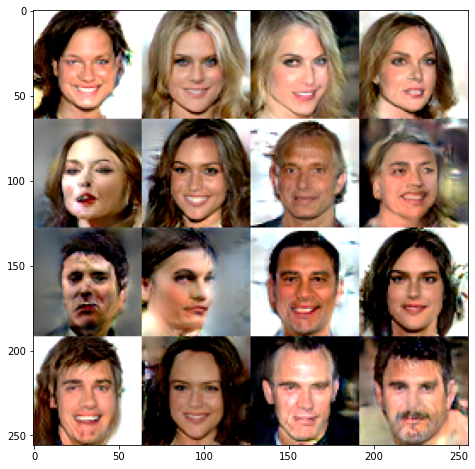

In [29]:
latent_vector = dataset_tools.get_latent_vector(16, latent_dim).to(device)

images = generator(latent_vector)
images = images.detach().cpu().numpy()
images = np.transpose(images, (0, 2, 3, 1))
images = (images + 1) / 2

# Concat images into 4x4 image
resolution = 2 ** (size_level + 2)
out_image = np.zeros((4 * resolution, 4 * resolution, 3))
for i in range(4):
    for j in range(4):
        out_image[i * resolution : (i + 1) * resolution, j * resolution : (j + 1) * resolution, :] = images[i * 4 + j]

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.imshow(out_image)
plt.show()

In [30]:
latent_vector1 = latent_vector[1].unsqueeze(0)

In [20]:
latent_vector2 = latent_vector[12].unsqueeze(0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


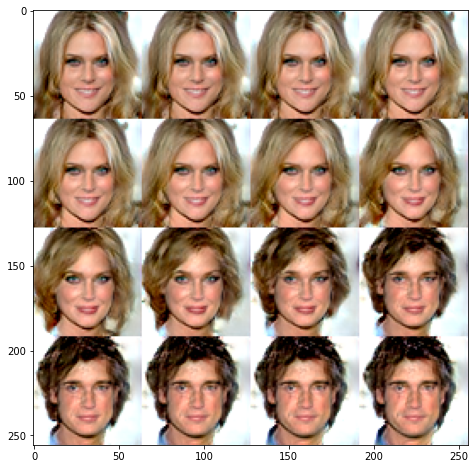

In [31]:
latent_vector_lerped = torch.zeros((16, latent_dim, 1, 1)).to(device)
for i in range(16):
    latent_vector_lerped[i] = latent_vector1 + (latent_vector2 - latent_vector1) * i / 15
    # normalize latent vector to unit sphere
    latent_vector_lerped[i] = latent_vector_lerped[i] / torch.norm(latent_vector_lerped[i])

images = generator(latent_vector_lerped)
images = images.detach().cpu().numpy()
images = np.transpose(images, (0, 2, 3, 1))
images = (images + 1) / 2

# Concat images into 4x4 image
resolution = 2 ** (size_level + 2)
out_image = np.zeros((4 * resolution, 4 * resolution, 3))
for i in range(4):
    for j in range(4):
        out_image[i * resolution : (i + 1) * resolution, j * resolution : (j + 1) * resolution, :] = images[i * 4 + j]

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.imshow(out_image)
plt.show()